# Analyse Exploratoire du fichier myreport_sql_general_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pd.read_csv('../data/logServer/myreport_sql_general_full.csv',sep=',')

### Le fichier 241016_LogETL.csv : taille, colonnes

In [3]:
tab.shape

(2882, 12)

Il y a 171 489 lignes et 28 colonnes dans le dataframe. 

In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Connexions utilisateur',
       'Connexions utilisateur(RAW)', 'Connexions/s', 'Connexions/s(RAW)',
       'Déconnexions/s', 'Déconnexions/s(RAW)', 'Temps mort',
       'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date et heure                2882 non-null   object 
 1   Date et heure(RAW)           2881 non-null   float64
 2   Connexions utilisateur       2195 non-null   object 
 3   Connexions utilisateur(RAW)  2194 non-null   float64
 4   Connexions/s                 1848 non-null   object 
 5   Connexions/s(RAW)            2194 non-null   float64
 6   Déconnexions/s               1849 non-null   object 
 7   Déconnexions/s(RAW)          2194 non-null   float64
 8   Temps mort                   2195 non-null   object 
 9   Temps mort(RAW)              2194 non-null   float64
 10  Couverture                   2882 non-null   object 
 11  Couverture(RAW)              2881 non-null   float64
dtypes: float64(6), object(6)
memory usage: 270.3+ KB


In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                  2882
Date et heure(RAW)             2881
Connexions utilisateur           71
Connexions utilisateur(RAW)     103
Connexions/s                     77
Connexions/s(RAW)              1166
Déconnexions/s                   77
Déconnexions/s(RAW)            1173
Temps mort                        1
Temps mort(RAW)                   1
Couverture                        3
Couverture(RAW)                   2
dtype: int64


In [7]:
tab.head()

,Date et heure,Date et heure(RAW),Connexions utilisateur,Connexions utilisateur(RAW),Connexions/s,Connexions/s(RAW),Déconnexions/s,Déconnexions/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,"5,50 #",5.5,"0,04 #",0.0355,"0,04 #",0.0358,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,4 #,4.0,NaN,0.0070,NaN,0.0070,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,4 #,4.0,"0,05 #",0.0514,"0,05 #",0.0514,0 %,0.0,100 %,10000.0


In [8]:
tab["Date et heure"] = tab["Date et heure"].str.split(" - ").str[0]
tab = tab.iloc[:-5]
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [9]:
tab.shape

(1248, 12)

### Réagencement et Suppression des colonnes

In [10]:
# renommage des colonnes
tab.rename(columns={"Connexions utilisateur(RAW)": "Connexions utilisateur(nb)"}, inplace=True)
tab.rename(columns={"Connexions/s(RAW)": "Connexions/s(nb)"}, inplace=True)
tab.rename(columns={"Déconnexions/s(RAW)": "Déconnexions/s(nb)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort sql general(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture sql general(%)"}, inplace=True)

In [11]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Connexions/s"])
tab = tab.drop(columns=["Déconnexions/s"])
tab = tab.drop(columns=["Connexions utilisateur"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

In [12]:
tab.head()

,Date et heure,Connexions utilisateur(nb),Connexions/s(nb),Déconnexions/s(nb),Temps mort sql general(%),Couverture sql general(%)
288,2024-08-25 00:00:00,8.0000,0.3020,0.3022,0.0,10000.0
289,2024-08-25 01:00:00,7.1667,0.2928,0.2925,0.0,10000.0
290,2024-08-25 02:00:00,6.3333,0.0742,0.0753,0.0,10000.0
291,2024-08-25 03:00:00,4.0000,0.0047,0.0047,0.0,10000.0
292,2024-08-25 04:00:00,4.1667,0.0686,0.0686,0.0,10000.0


### Analyse temporelle

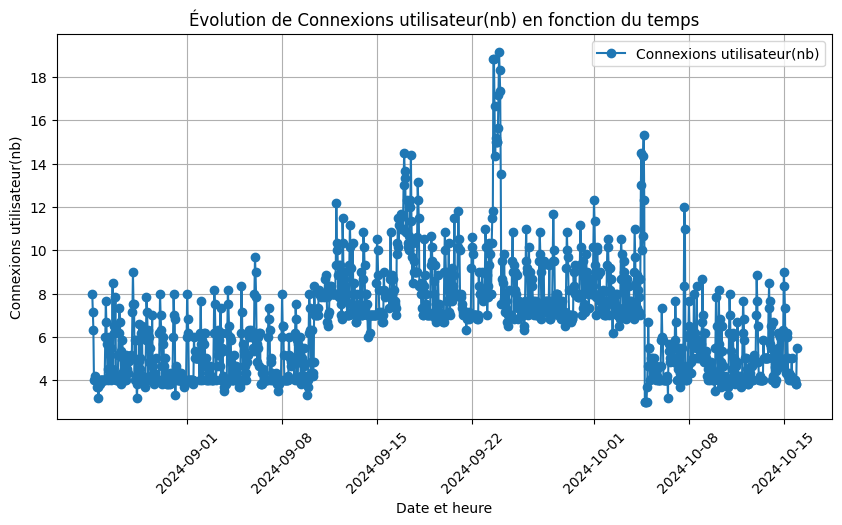

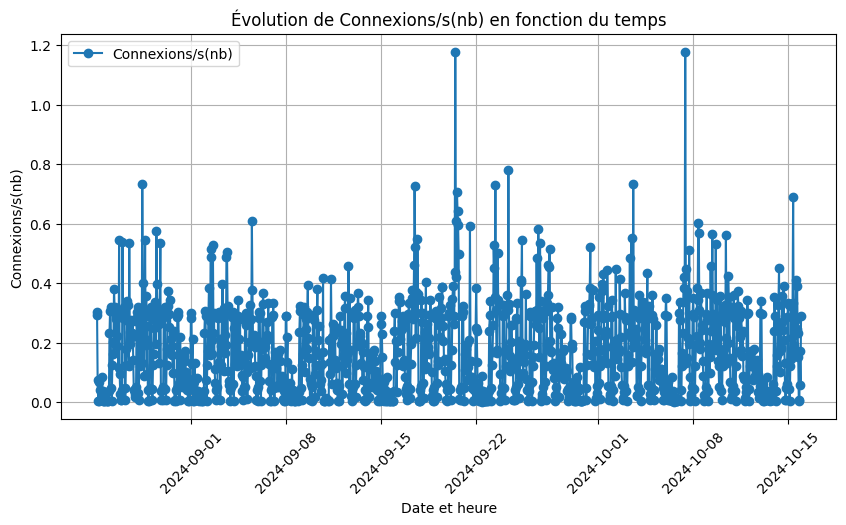

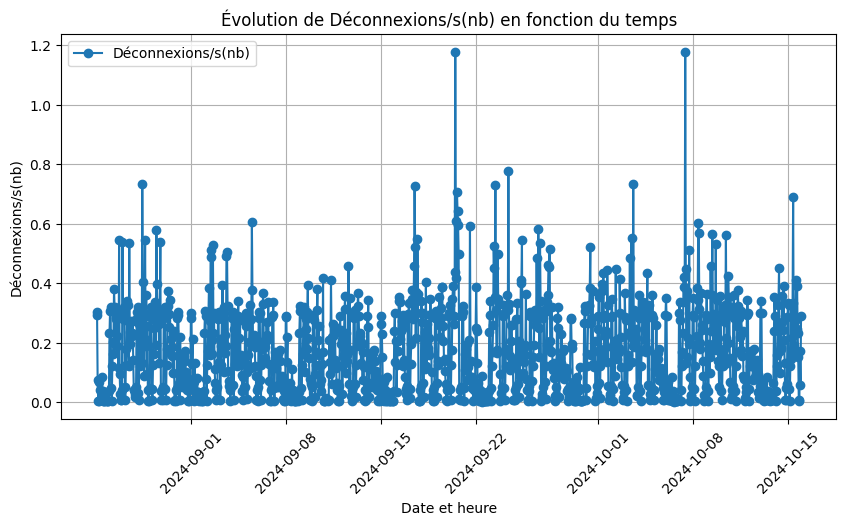

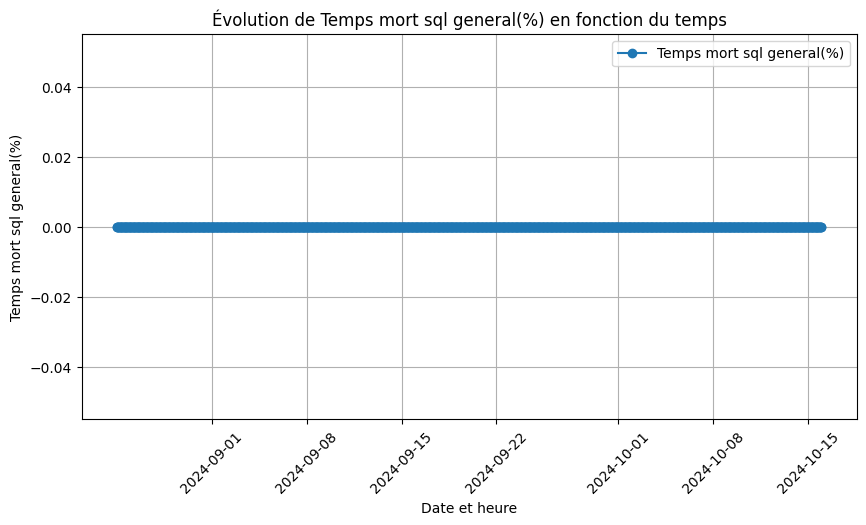

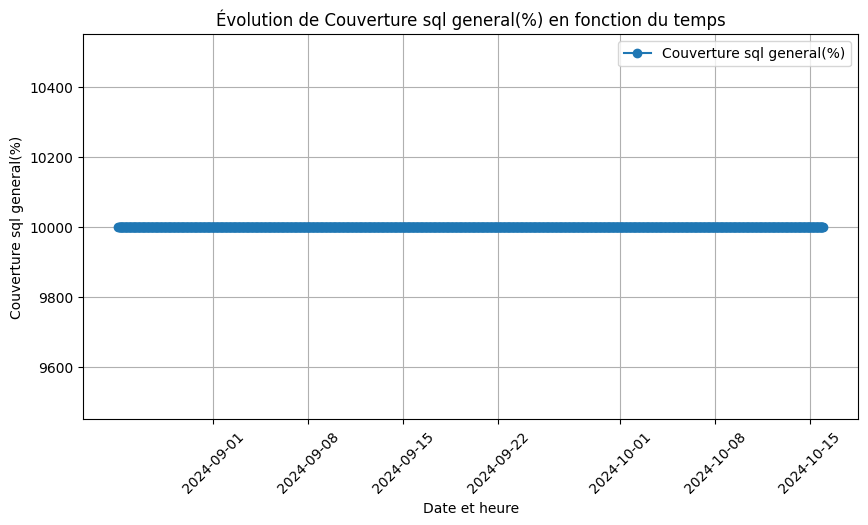

In [13]:
# Vérifier que 'date_full' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["Date et heure"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

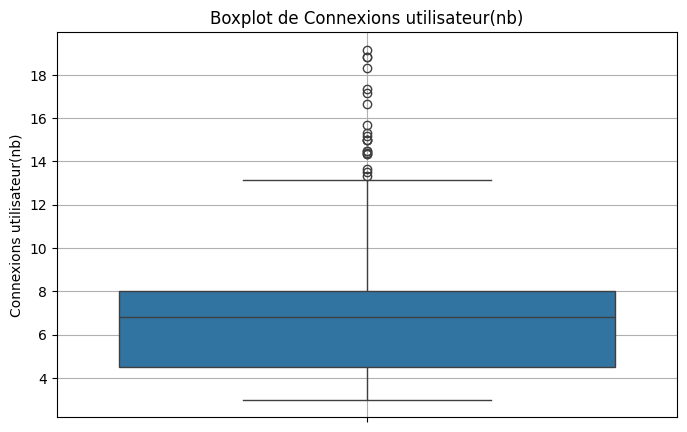

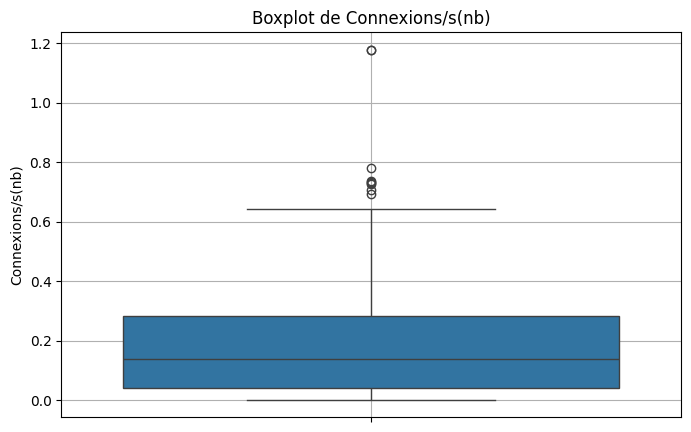

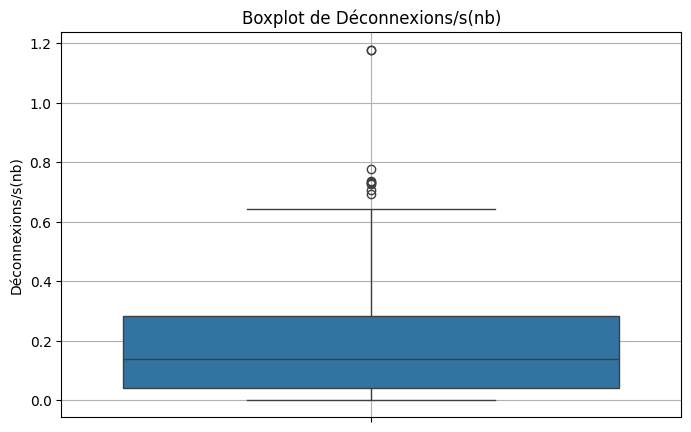

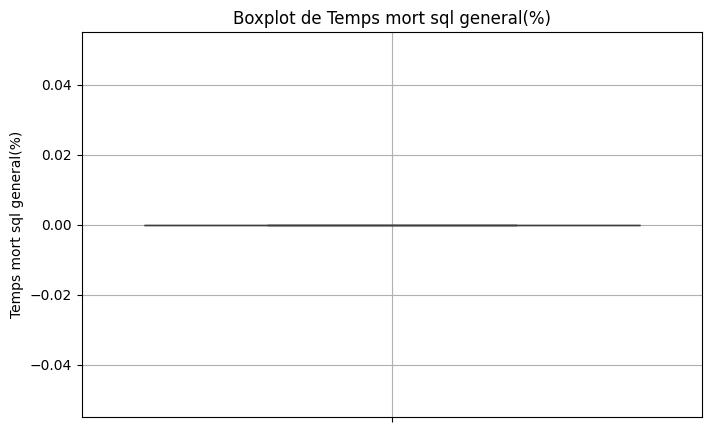

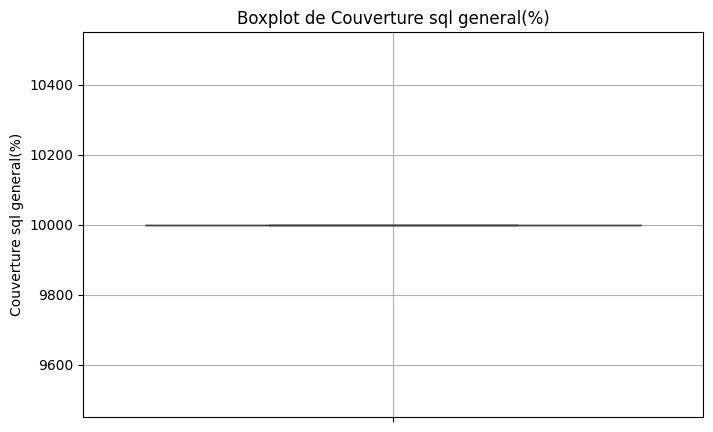

In [14]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

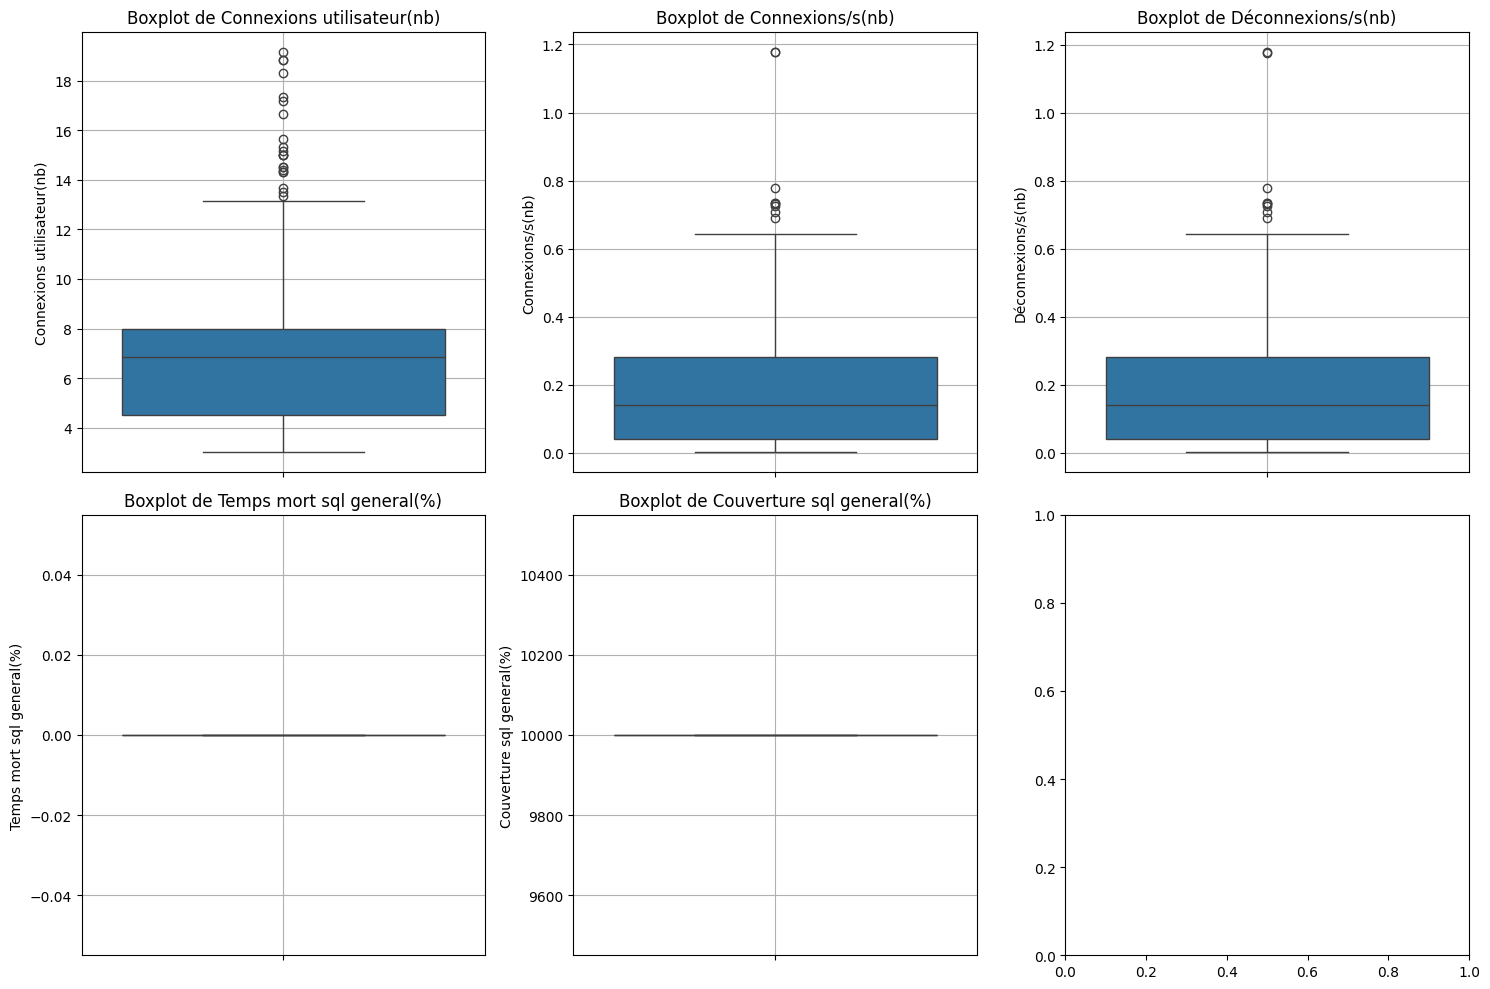

In [15]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [16]:
tab = tab.drop(columns=["Temps mort sql general(%)"])
tab = tab.drop(columns=["Couverture sql general(%)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [17]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_general_filtered.csv", index=False, encoding='utf-8')